# Integration Methods
## 1
### Basic inigrator tester (niet in verslag)
##### used to test if integrator blocks work with the clock as input (x = x)

In [ ]:
from CBD.src.pyCBD.lib.std import TimeBlock, ConstantBlock
from pyCBD.simulator import Simulator
from DrawioFiles.generated.Backwards_Euler_Method import *

class basic_intregral_tester(CBD):
    def __init__(self, block_name, block_to_test):
        super().__init__(block_name, input_ports=[], output_ports=['OUT1'])

        # Create the Blocks
        self.addBlock(TimeBlock("Clock_item"))
        self.addBlock(ConstantBlock("Constant_item", 0))
        self.addBlock(block_to_test)

        # Create the Connections
        self.addConnection("Clock_item", block_to_test.getBlockName(), output_port_name="OUT1", input_port_name="IN1")
        self.addConnection("Constant_item", block_to_test.getBlockName(), output_port_name='OUT1', input_port_name="IC")
        self.addConnection(block_to_test.getBlockName(), "OUT1", output_port_name='OUT1')

### Backwards Euler
##### First generate the python using the draw.io file \
![image info](./DrawioFiles/ImageExports/Backwards_Euler_Method.drawio.png) \
Remake image:

In [ ]:
! drawio -x -f png -o ./DrawioFiles/ImageExports/Backwards_Euler_Method.drawio.png ./DrawioFiles/Backwards_Euler_Method.drawio

In [ ]:
! python DrawioConvert/__main__.py -F CBD -e backwards_euler_method -sSrgv ./DrawioFiles/Backwards_Euler_Method.drawio -E delta=1 -d ./DrawioFiles/generated/ -f

In [ ]:
from DrawioFiles.generated.Backwards_Euler_Method import *
DELTA_T = 1

backwards_euler_tester = backwards_eurler_method("backwards_euler_tester")
cbd = basic_intregral_tester("tester", backwards_euler_tester)

comperisionBlock = basic_intregral_tester("tester", IntegratorBlock("Intigrator"))

# Run the Simulation
sim = Simulator(cbd)
sim.setDeltaT(DELTA_T)
sim.run(10)

sim = Simulator(comperisionBlock)
sim.setDeltaT(DELTA_T)
sim.run(10)


print(cbd.getSignals())

correct = True
for i, compareItem in enumerate(cbd.getSignals()['OUT1']):
    if compareItem != comperisionBlock.getSignals()['OUT1'][i]:
        correct = False
if correct:
    print("Backward euler is correct")
else:
    print("Backward euler is incorect")
# TODO: Process Your Simulation Results

### Forward Euler
##### First generate the python using the draw.io file
![image info](./DrawioFiles/ImageExports/Forward_Euler_Method.drawio.png) \
remake image:

In [ ]:
! drawio -x -f png -o ./DrawioFiles/ImageExports/Forward_Euler_Method.drawio.png ./DrawioFiles/Forward_Euler_Method.drawio

In [ ]:
! python DrawioConvert/__main__.py -F CBD -e forward_euler_method -sSrgv ./DrawioFiles/Forward_Euler_Method.drawio -E delta=1 -d ./DrawioFiles/generated/ -f

In [ ]:
from DrawioFiles.generated.Forward_Euler_Method import *
DELTA_T = 1

forward_euler = forward_euler_method("forward_euler_method")
cbd = basic_intregral_tester("tester", forward_euler)

# Run the Simulation
sim = Simulator(cbd)
sim.setDeltaT(DELTA_T)
sim.run(10)
print(cbd.getSignals())

### Trapiziod rule
##### First generate the python using the draw.io file
![image info](./DrawioFiles/ImageExports/Trapezoid_Rule.drawio.png)
Remake image

In [ ]:
! drawio -x -f png -o ./DrawioFiles/ImageExports/Trapezoid_Rule.drawio.png ./DrawioFiles/Trapezoid_Rule.drawio

In [ ]:
! python DrawioConvert/__main__.py -F CBD -e trapezoid_rule -sSrgv ./DrawioFiles/Trapezoid_Rule.drawio -E delta=1 -d ./DrawioFiles/generated/ -f

In [ ]:
from DrawioFiles.generated.Trapezoid_Rule import *
from pyCBD.simulator import Simulator
        
DELTA_T = 1

trapezoid = trapezoid_rule("trapezoid_rule")
cbd = basic_intregral_tester("trapezoid_euler_method", trapezoid)

# Run the Simulation
sim = Simulator(cbd)
sim.setDeltaT(DELTA_T)
sim.run(10)
print(cbd.getSignals())

## 2 function g(t)
##### First generate the python using the draw.io file
![image info](./DrawioFiles/ImageExports/g_Function.drawio.png)
Remake image:

In [ ]:
! drawio -x -f png -o ./DrawioFiles/ImageExports/g_Function.drawio.png ./DrawioFiles/g_Function.drawio

In [ ]:
! python DrawioConvert/__main__.py -F CBD -e g_function -sSrgv ./DrawioFiles/g_Function.drawio -E delta=1 -d ./DrawioFiles/generated/ -f

#### Create CBD to connect integrators with g(f)

In [ ]:
from CBD.src.pyCBD.lib.std import TimeBlock, ConstantBlock
from pyCBD.simulator import Simulator
from DrawioFiles.generated.g_Function import *


class g_function_integrator_tester(CBD):
    def __init__(self, block_name, integrator):
        super().__init__(block_name, input_ports=[], output_ports=['OUT1', 'Gt'])

        # Create the Blocks
        self.addBlock(TimeBlock("Clock_item"))
        self.addBlock(g_function("g_function"))
        self.addBlock(integrator)
        #self.addBlock(g_function("g_function_initial"))
        
        constBlock = ConstantBlock("Constant_item")
        constBlock.setValue(0)
        self.addBlock(constBlock)
        
        # Create the Connections
        self.addConnection("Clock_item", "g_function", output_port_name="OUT1", input_port_name="T")
        #self.addConnection("Constant_item", "g_function_initial", output_port_name='OUT1', input_port_name="T")
        self.addConnection("Constant_item", integrator.getBlockName(), output_port_name='OUT1', input_port_name="IC")
        self.addConnection("g_function", integrator.getBlockName(), output_port_name='OUT1', input_port_name="IN1")
        self.addConnection(integrator.getBlockName(), "OUT1", output_port_name='OUT1')
        self.addConnection("g_function", "Gt", output_port_name='OUT1')



#### Test g(f) on Backwards Euler Method

In [ ]:
from DrawioFiles.generated.Backwards_Euler_Method import *
DELTA_T = 0.01

backwards_euler = backwards_eurler_method("backwards_euler")
cbd = g_function_integrator_tester("tester", backwards_euler)


# Run the Simulation
sim = Simulator(cbd)
sim.setDeltaT(DELTA_T)
sim.run(100)


comperisionBlock = g_function_integrator_tester("tester1", IntegratorBlock("Intigrator"))

sim = Simulator(comperisionBlock)
sim.setDeltaT(DELTA_T)
sim.run(100)


correct = True
# 
# for i, compareItem in enumerate(cbd.getSignals()['OUT1']):
#     print(compareItem," != ", comperisionBlock.getSignals()['OUT1'][i])
#     if compareItem != comperisionBlock.getSignals()['OUT1'][i]:
#         correct = False
print(cbd.getSignals()['OUT1'].pop(), comperisionBlock.getSignals()['OUT1'].pop())
if correct:
    print("Backward euler is correct")
else:
    print("Backward euler is incorect")

#### Test g(f) on Forward Euler Method

In [ ]:
from DrawioFiles.generated.Backwards_Euler_Method import *
DELTA_T = 0.1

forward_euler = forward_euler_method("forward_euler")
cbd = g_function_integrator_tester("tester", forward_euler)

# Run the Simulation
sim = Simulator(cbd)
sim.setDeltaT(DELTA_T)
sim.run(100)
# 
# for i, compareItem in enumerate(cbd.getSignals()['OUT1']):
#     print(compareItem," != ", comperisionBlock.getSignals()['OUT1'][i])
#     if compareItem != comperisionBlock.getSignals()['OUT1'][i]:
#         correct = False
print(cbd.getSignals()['OUT1'].pop())

#### Test g(f) on Trapiziod rule

In [ ]:
from DrawioFiles.generated.Backwards_Euler_Method import *
DELTA_T = 1

trapezoid = trapezoid_rule("trapezoid")
cbd = g_function_integrator_tester("tester", trapezoid)

# Run the Simulation
sim = Simulator(cbd)
sim.setDeltaT(DELTA_T)
sim.run(100)

correct = True
# 
# for i, compareItem in enumerate(cbd.getSignals()['OUT1']):
#     print(compareItem," != ", comperisionBlock.getSignals()['OUT1'][i])
#     if compareItem != comperisionBlock.getSignals()['OUT1'][i]:
#         correct = False
print(cbd.getSignals()['OUT1'].pop())
if correct:
    print("Backward euler is correct")
else:
    print("Backward euler is incorect")

### Task 3 Calculate for delta t

In [ ]:
forward_euler = forward_euler_method("forward_euler")
forward_euler_cbd_tester = g_function_integrator_tester("forward_euler_cbd_tester", forward_euler)

backward_euler = backwards_eurler_method("backwards_euler")
backward_euler_cbd_tester = g_function_integrator_tester("backbard_euler_cbd_tester", backward_euler)

trapezoid = trapezoid_rule("trapezoid")
trapezoid_cbd_tester = g_function_integrator_tester("trapezoid_cbd_tester", trapezoid)

for time in [0.1, 0.01, 0.001]:
    DELTA_T = time
    sim = Simulator(forward_euler_cbd_tester)
    sim.setDeltaT(DELTA_T)
    sim.run(100)
    
    sim = Simulator(backward_euler_cbd_tester)
    sim.setDeltaT(DELTA_T)
    sim.run(100)
    
    sim = Simulator(trapezoid_cbd_tester)
    sim.setDeltaT(DELTA_T)
    sim.run(100)
    print("-----------------------------")
    print("delta t:", DELTA_T)
    print("backward:", backward_euler_cbd_tester.getSignals()['OUT1'].pop())
    print("forward:", forward_euler_cbd_tester.getSignals()['OUT1'].pop())
    print("trapezoid: ", trapezoid_cbd_tester.getSignals()['OUT1'].pop())
    print("-----------------------------")
    


# Co-simulation

#### Sub-task 1: Plant FMU from Modelica Done (see Co-Simulation folder)

#### Sub-task 2: Sub-task 2: PID Controller in PyCBD
First generate image of PID controller

![image info](./DrawioFiles/ImageExports/PID_controller.drawio.png)

In [ ]:
! drawio -x -f png -o ./DrawioFiles/ImageExports/PID_controller.drawio.png ./DrawioFiles/PID_controller.drawio

Create python code

In [ ]:
! python DrawioConvert/__main__.py -F CBD -e g_function -sSrgv ./DrawioFiles/PID_controller.drawio -E delta=1 -d ./DrawioFiles/generated/ -f

Test PID block (prints list of values, compare with Modelica block) #TODO momenteel niet hetzelfde idk why

In [ ]:
from DrawioFiles.generated.PID_controller import *

class PID_controller_Tester(CBD):
    def __init__(self, block_name, block_to_test):
        super().__init__(block_name, input_ports=[], output_ports=['OUT1'])

        # Create the Blocks
        self.addBlock(ConstantBlock("INPUT_ITEM", 20))
        self.addBlock(block_to_test)

        # Create the Connections
        self.addConnection("INPUT_ITEM", block_to_test.getBlockName(), output_port_name="OUT1", input_port_name="IN")
        self.addConnection(block_to_test.getBlockName(), "OUT1", output_port_name='OUT')

from DrawioFiles.generated.Backwards_Euler_Method import *
DELTA_T = 1

pid_controller = PID_controller("trapezoid")
cbd = PID_controller_Tester("tester", pid_controller)

# Run the Simulation
sim = Simulator(cbd)
sim.setDeltaT(DELTA_T)
sim.run(100)

print(cbd.getSignals())

Now create a FMU of the controller CBD by running CBD2FMU/src/generator.py #TODO warnings a problem???

In [58]:
! python CBD2FMU/src/generator.py
! mv PID_controller.fmu ./Co-simulation/

Compiling platform binary...
/tmp/tmp7thwqcqh/sources
gcc -c -fPIC -I. -I'/home/steen/Documents/Local projects/MoSIS_Assignments/Assignment2/.venv/lib/python3.12/site-packages/fmpy/c-code'  all.c lsolve.c && gcc -static-libgcc -shared -oPID_controller.so *.o -lm


Run the orchestration_script that combines the Plant and controller

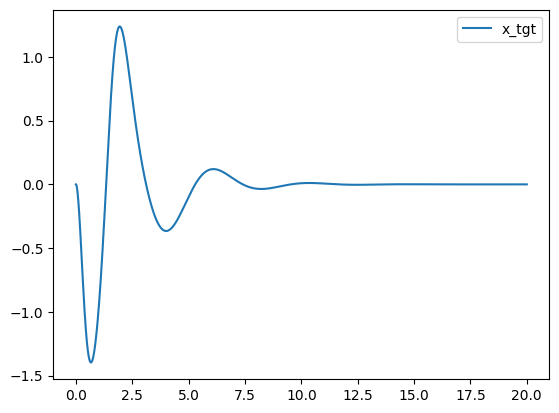

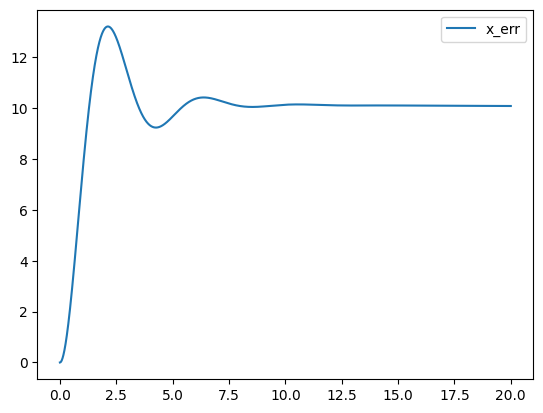

In [60]:
# script: Co-simulation/orchestration_script.py

from fmpy import simulate_fmu
from fmpy.fmucontainer import create_fmu_container, Connection, Configuration, Component, Variable
from fmpy.validation import validate_fmu
from fmpy.util import compile_platform_binary
from fmpy.model_description import DefaultExperiment


if __name__ == "__main__":

	configuration = Configuration(
		fmiVersion='2.0',
		defaultExperiment=DefaultExperiment(
			startTime='0',
			stopTime='20',
			tolerance='1e-7',
			stepSize='0.001'
		),
		parallelDoStep=False,
		variables = [
			Variable(
				type='Real',
				initial='calculated',
				variability='continuous',
				causality='output',
				name='x',
				mapping=[('plant', 'output_con')]
			),
			Variable(
				type='Real',
				initial='calculated',
				variability='continuous',
				causality='output',
				name='theta',
				mapping=[('plant', 'out_angular_disp')]
			)
		],
		components=[
			Component(
				filename='Co-simulation/Plant.fmu',
				name='plant'
			),
			Component(
				filename='Co-simulation/Controller.fmu',
				name='pid'
			)
		],
		connections=[
			Connection('pid', 'PID_controller.OUT', 'plant', 'input_con'),
			Connection('plant', 'output_con', 'pid', 'PID_controller.IN')
		]
	)

	create_fmu_container(configuration, "Co-simulation/Container.fmu")
	problems = validate_fmu("Co-simulation/Container.fmu")
	if problems:
		print("PROBLEMS ENCOUNTERED WITH COMBINED FMU:")
		print(problems)
		exit()

	result = simulate_fmu("Co-simulation/Container.fmu",
						  #debug_logging=True,
						  #fmi_call_logger=print,
						  stop_time=20,
						  output_interval=0.001)

	import matplotlib.pyplot as plt

	plt.plot([r[0] for r in result], [r[2] for r in result], label="x_tgt")
	#plt.plot([r[0] for r in result], [r[3] for r in result], label="x_ego")
	plt.legend()
	plt.show()
	plt.plot([r[0] for r in result], [r[1] for r in result], label="x_err")
	plt.legend()
	plt.show()


To get results combined with previuos exercise run parameter_tuning.py from Assignment 1 #TODO these are WRONG